<a href="https://colab.research.google.com/github/SelRncn/TLG/blob/main/DS_C3_SC1_SELENE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 6: Visualización de datos en Python**
# **Reto: Explorando el índice de felicidad**
Selene Rodríguez Rincón

***1. Cargar los datos en un DataFrame***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

happiness = pd.read_csv('/content/drive/MyDrive/The Learning Gate/Happiness_report.csv')
happiness.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


***2. Filtrar la información de México y establecer nuevo índice***

A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [ ]:
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


***3. Histograma del puntuaje***

Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

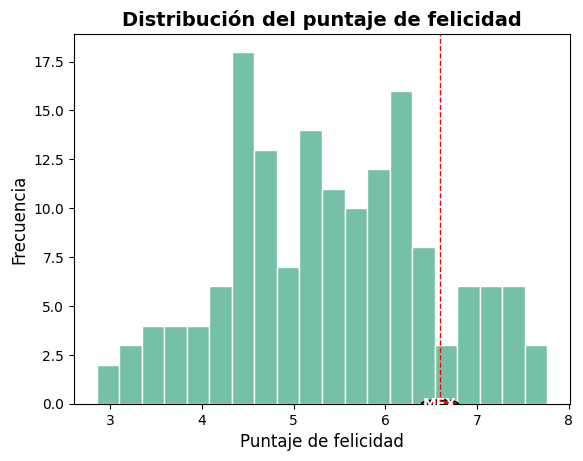

In [ ]:
# Crear el histograma
plt.hist(happiness['Score'], bins=20, color='#76C1A5', edgecolor='white')

# Ubicar el valor de México y agregar una etiqueta personalizada
mexico_score = mexico['Score'].values[0]
plt.axvline(mexico_score, color='red', linestyle='dashed', linewidth=1)

# Crear un círculo con la etiqueta 'MEX' en lugar de texto simple
circle = plt.Circle((mexico_score, 0), 0.2, color='red', ec='black')
plt.gca().add_patch(circle)
plt.text(mexico_score, 0, 'MEX', color='white', ha='center', va='center', fontsize=10, fontweight='bold')

# Personalizar título y etiquetas
plt.title('Distribución del puntaje de felicidad', fontsize=14, fontweight='bold')
plt.xlabel('Puntaje de felicidad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


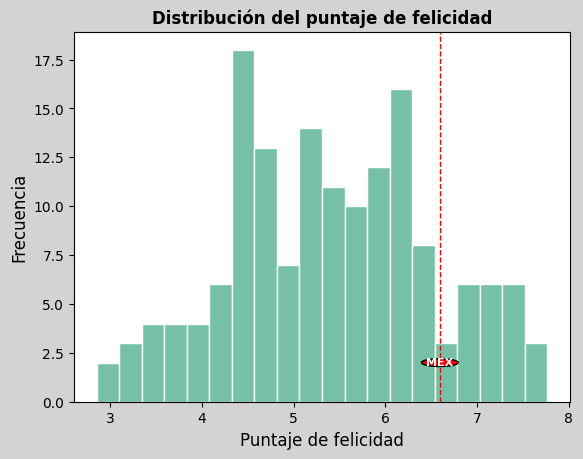

In [ ]:
# Crear la figura con un color de fondo gris claro
fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgray')  # Cambiar el color de fondo de toda la figura

# Crear el histograma
ax.hist(happiness['Score'], bins=20, color='#76C1A5', edgecolor='white')

# Ubicar el valor de México y agregar una etiqueta personalizada
mexico_score = mexico['Score'].values[0]
ax.axvline(mexico_score, color='red', linestyle='dashed', linewidth=1)

# Crear un círculo con la etiqueta 'MEX' en lugar de texto simple
circle = plt.Circle((mexico_score, 2), 0.2, color='red', ec='black')
ax.add_patch(circle)
ax.text(mexico_score, 2, 'MEX', color='white', ha='center', va='center', fontsize=8, fontweight='bold')

# Personalizar título y etiquetas
ax.set_title('Distribución del puntaje de felicidad', fontsize=12, fontweight='bold')
ax.set_xlabel('Puntaje de felicidad', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
plt.show()


***4. Boxplot de la esperanza de vida***

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.


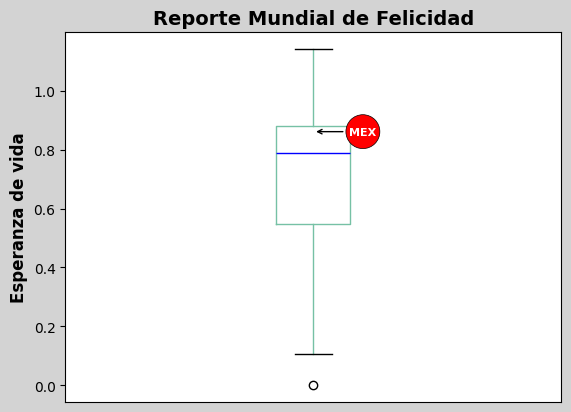

In [ ]:
# Crear la figura y el gráfico
fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgray')

# Crear el boxplot para la columna de esperanza de vida (Healthy life expectancy)
bp = ax.boxplot(
    happiness['Healthy life expectancy'].dropna(),
    vert=True,
    patch_artist=False,
    boxprops=dict(color='#76C1A5'),
    whiskerprops=dict(color='#76C1A5'),
    capprops=dict(color='black'),
    medianprops=dict(color='blue')
)

# Obtener el valor de esperanza de vida de México
mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]

# Añadir una anotación con flecha en el valor de México
ax.annotate(
    'MEX',
    xy=(1, mexico_life_expectancy),
    xytext=(1.1, mexico_life_expectancy),
    ha='center', va='center',
    fontsize=8, fontweight='bold',
    color='white',
    bbox=dict(boxstyle='circle,pad=0.3', fc='red', ec='black', lw=0.5),
    arrowprops=dict(arrowstyle='->', color='black')
)

# Personalizar título y etiquetas
ax.set_title('Reporte Mundial de Felicidad', fontsize=14, fontweight='bold')
ax.set_ylabel('Esperanza de vida', fontsize=12, fontweight='bold')
ax.set_xticks([])  # Ocultar etiquetas del eje x, ya que solo tenemos una categoría
plt.show()


***5. Gráfica circular para los factores de contribución en México***

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.
* Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.


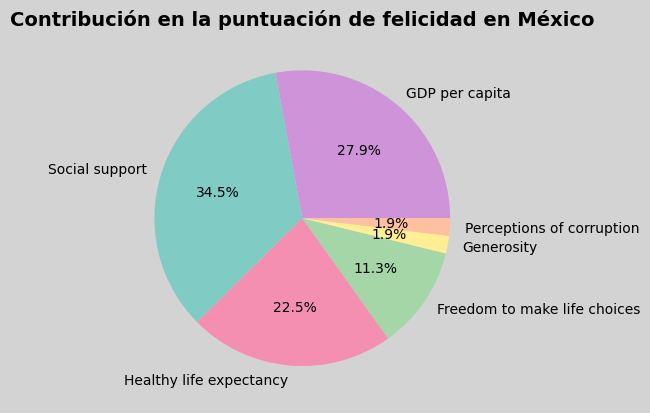

In [ ]:
# Estructura del DataFrame
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
mexico_factors = mexico[factors].values[0]

# Crear la figura y el gráfico
fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgray')

plt.pie(mexico_factors, labels=factors, autopct='%1.1f%%', colors=['#CE93D8', '#80CBC4', '#F48FB1', '#A5D6A7', '#FFEE93', '#FFC09F'])
plt.title('Contribución en la puntuación de felicidad en México', fontsize=14, fontweight='bold')
plt.show()

***6. Gráfica de barras para 5 países***

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

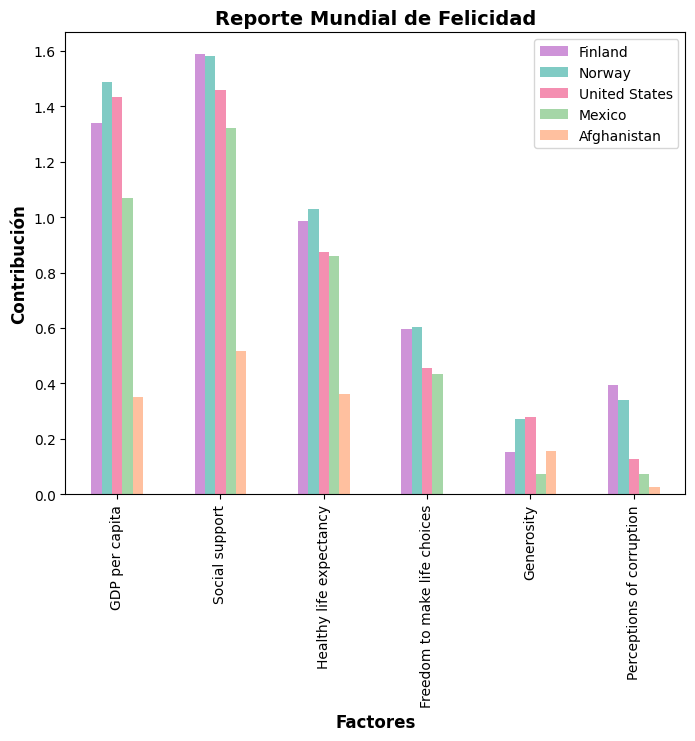

In [ ]:
countries = ['Finland', 'Afghanistan', 'Mexico', 'Norway', 'United States']
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Filtrar los datos para esos países específicos
selected_countries = happiness[happiness['Country or region'].isin(countries)]
selected_countries.set_index('Country or region', inplace=True)

# Crear la gráfica de barras y asignar colores
colors = ['#CE93D8', '#80CBC4', '#F48FB1', '#A5D6A7', '#FFC09F']
ax = selected_countries[factors].T.plot(kind='bar', color=colors, figsize=(8, 6))
fig.patch.set_facecolor('lightgray')

# Personalizar título y etiquetas
ax.legend(loc='upper right')
plt.title('Reporte Mundial de Felicidad', fontsize='14', fontweight='bold')
plt.ylabel('Contribución', fontsize='12', fontweight='bold')
plt.xlabel('Factores', fontsize='12', fontweight='bold')
plt.show()


***7. Matriz de subgráficas 2x3 de scatter plots:***

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

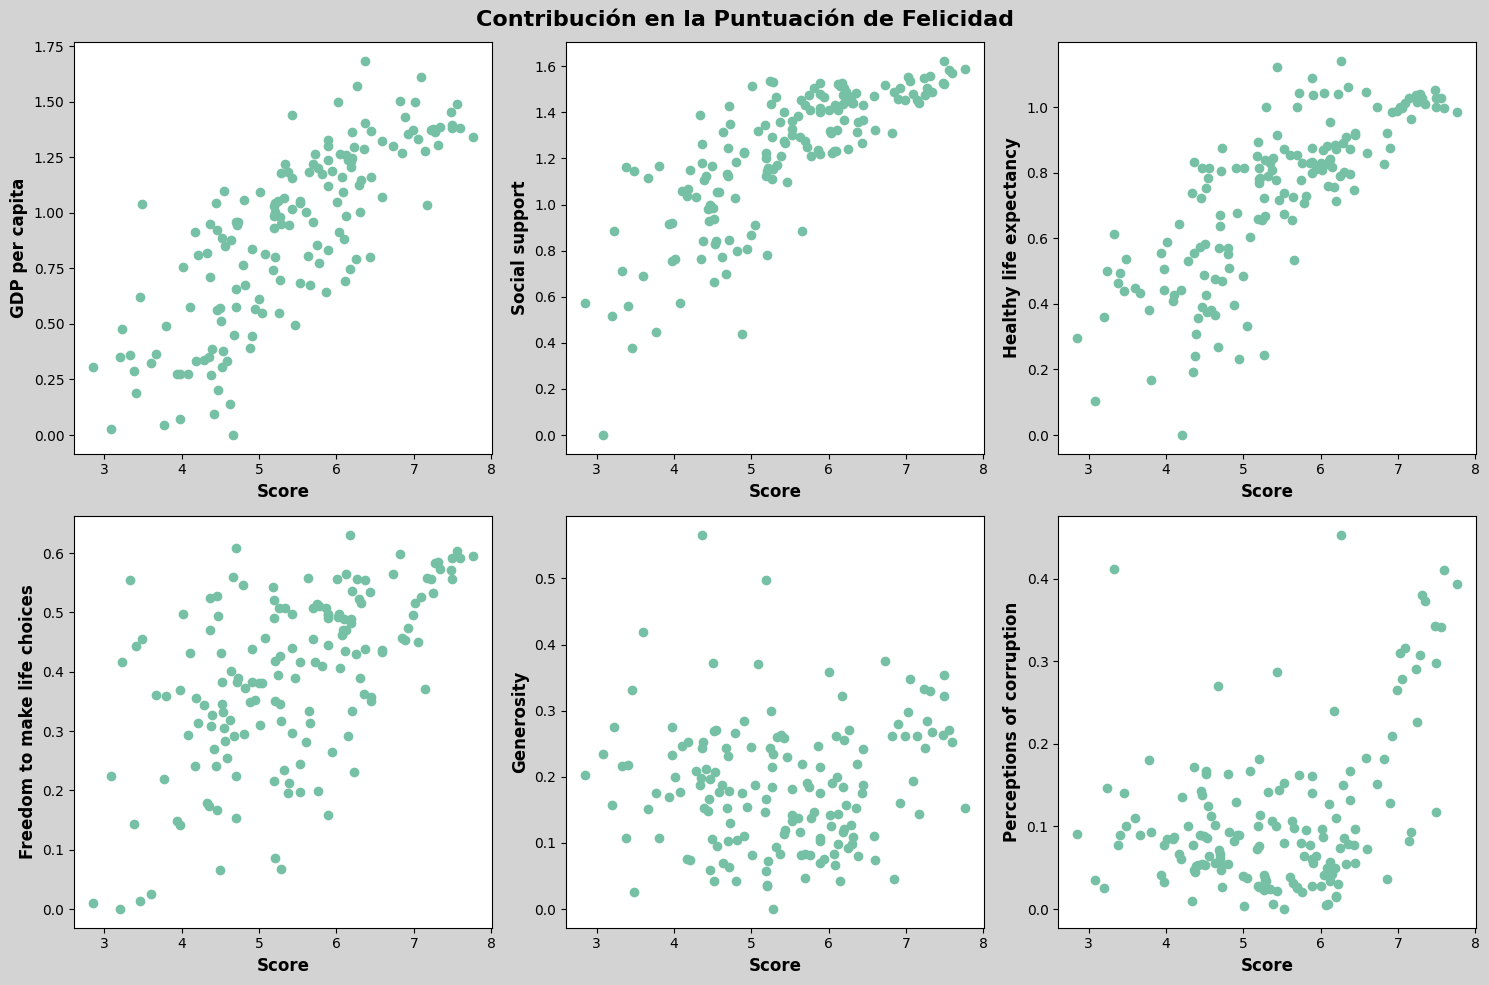

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_facecolor('lightgray')
fig.suptitle('Contribución en la Puntuación de Felicidad', fontsize=16, fontweight='bold', color='black')

for i, factor in enumerate(factors):
    row, col = divmod(i, 3)
    axs[row, col].scatter(happiness['Score'], happiness[factor], color='#76C1A5')
    axs[row, col].set_ylabel(factor, fontsize='12', fontweight='bold')
    axs[row, col].set_xlabel('Score', fontsize='12', fontweight='bold')
plt.tight_layout()
plt.show()


***8. Heatmap de correlación:***

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

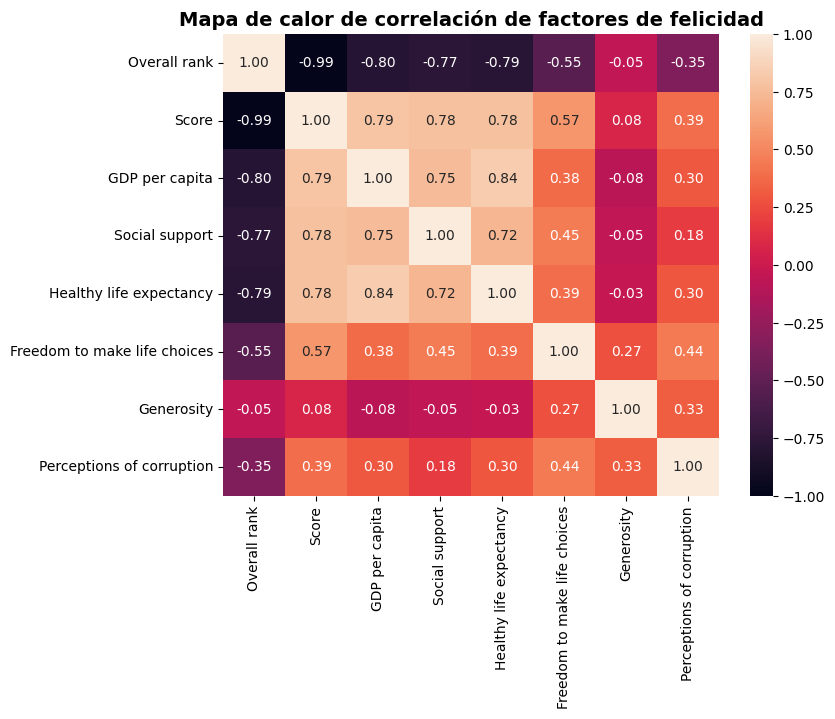

In [ ]:
factors = ['Overall rank', 'GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
score = happiness['Score']

# Crear el heatmap con la escala de color por defecto
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", vmin=-1, vmax=1,
            cbar_kws={'orientation': 'vertical'}, annot_kws={"size": 10})
plt.title('Mapa de calor de correlación de factores de felicidad', fontsize=14, fontweight='bold')
plt.show()

***9. Gráfica de felicidad promedio por región:***

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/The Learning Gate/Metadata.csv')
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,Country or region
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


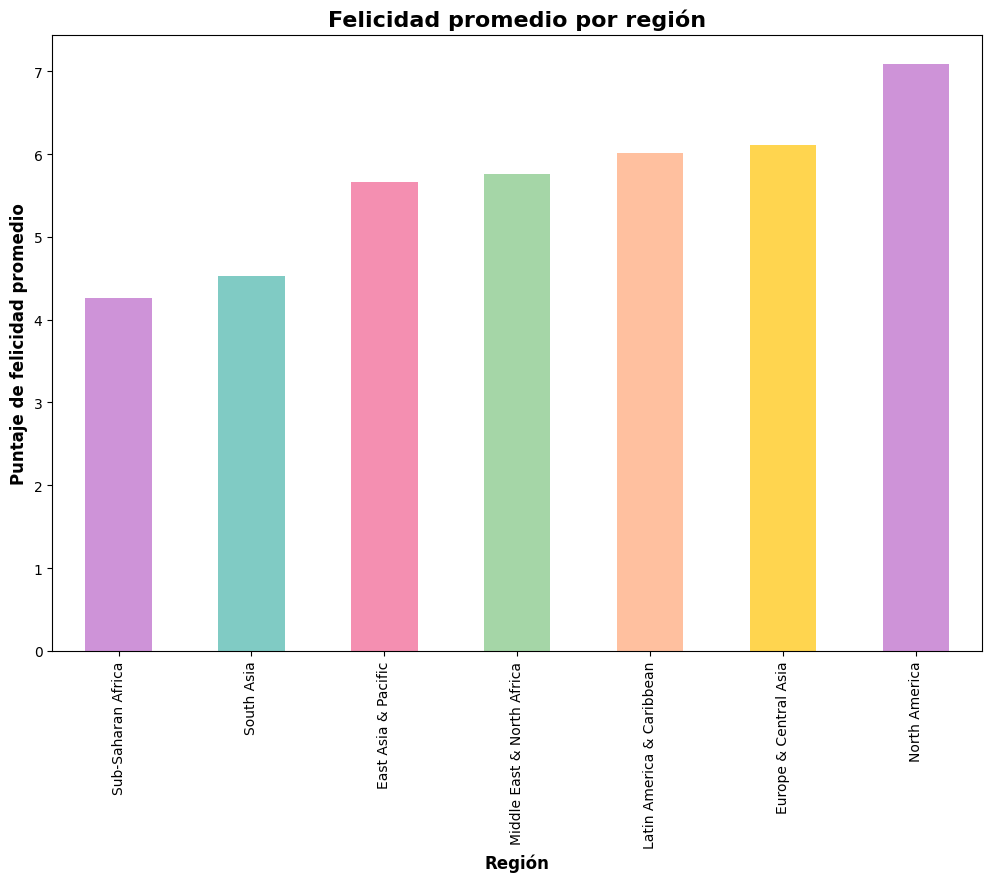

In [ ]:
merged_data = pd.merge(happiness, metadata, on='Country or region', how='inner')

# Calcular el puntaje promedio de felicidad por región
average_happiness_by_region = merged_data.groupby('Region')['Score'].mean()

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('lightgray')

colors = ['#CE93D8', '#80CBC4', '#F48FB1', '#A5D6A7', '#FFC09F', '#FFD54F']
average_happiness_by_region.sort_values().plot(kind='bar', color= colors)
plt.title('Felicidad promedio por región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=12, fontweight='bold')
plt.ylabel('Puntaje de felicidad promedio', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()


# **¡Muchas gracias por la revisión!**